<a href="https://colab.research.google.com/github/boxain/bike_sharing/blob/master/Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
! git clone https://github.com/boxain/bike_sharing.git

fatal: destination path 'bike_sharing' already exists and is not an empty directory.


### **載入資料**

In [312]:
data_train = pd.read_csv('./bike_sharing/train.csv')
data_test = pd.read_csv('./bike_sharing/test.csv')

### **確認資料概況**

In [313]:
data_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [314]:
data_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [315]:
data_train.shape , data_test.shape

((10886, 12), (6493, 9))

In [316]:
data_train[['season','holiday','workingday','weather']].info()
#需轉換datetime格式
#轉換類別資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   season      10886 non-null  int64
 1   holiday     10886 non-null  int64
 2   workingday  10886 non-null  int64
 3   weather     10886 non-null  int64
dtypes: int64(4)
memory usage: 340.3 KB


In [317]:
data_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


* datetime: 時間
* season: 1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday: 是否為假期，是為1不是為0
* workingday: 是否為上班日，是為1不是為0
* weather: 天氣狀況，最小值1(天氣好)最大值4(天氣差)
* temp: 溫度(攝氏)
* atemp: 體感溫度(攝氏)
* humidity: 濕度
* windspeed: 風速
* casual: 非註冊用戶的租用數量
* registered: 註冊用戶的租用數量
* count: 總出租數量

### **缺失值處理**

In [318]:
data_train.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

### **資料分析**

* 類別資料

* 數值資料

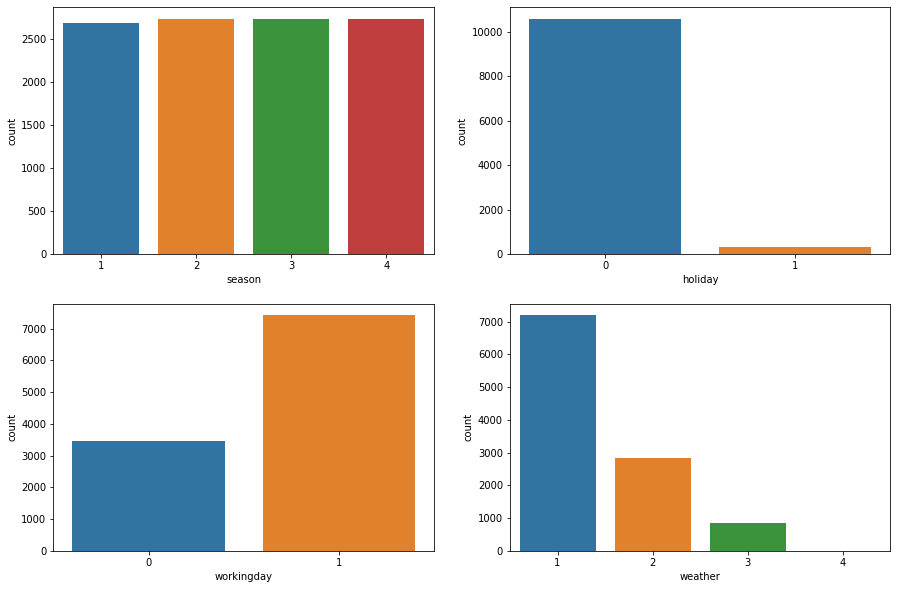

In [319]:
fig , axes = plt.subplots(2,2,figsize=(15,10))
sns.countplot(data=data_train,x='season',ax=axes[0,0])
sns.countplot(data=data_train,x='holiday',ax=axes[0,1])
sns.countplot(data=data_train,x='workingday',ax=axes[1,0])
sns.countplot(data=data_train,x='weather',ax=axes[1,1])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

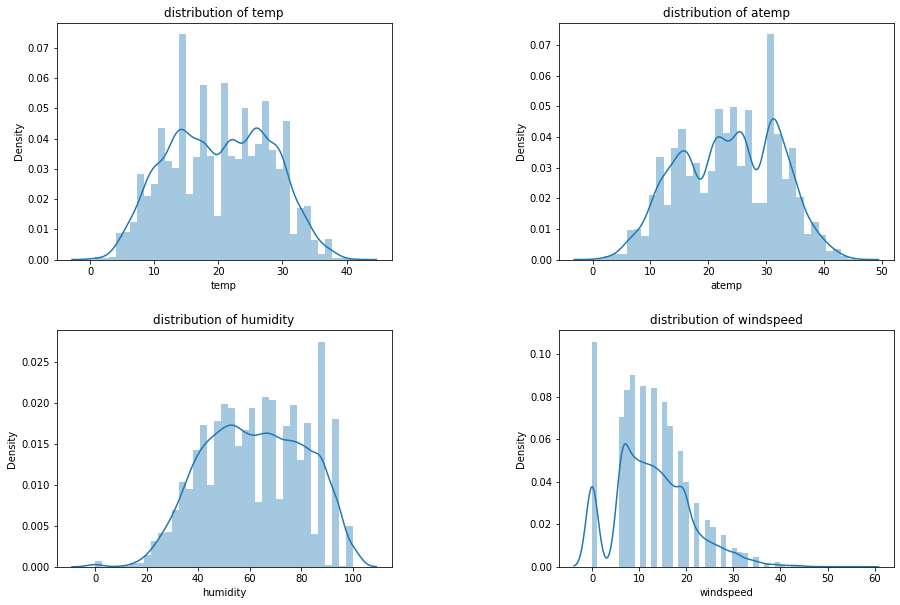

In [320]:
fig , axes = plt.subplots(2,2,figsize=(15,10))

sns.distplot(x=data_train['temp'],ax=axes[0,0]).set(xlabel='temp',title='distribution of temp')
sns.distplot(x=data_train['atemp'],ax=axes[0,1]).set(xlabel='atemp',title='distribution of atemp')
sns.distplot(x=data_train['humidity'],ax=axes[1,0]).set(xlabel='humidity',title='distribution of humidity')
sns.distplot(x=data_train['windspeed'],ax=axes[1,1]).set(xlabel='windspeed',title='distribution of windspeed')

fig.subplots_adjust(wspace=0.5,hspace=0.3) #調間距
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


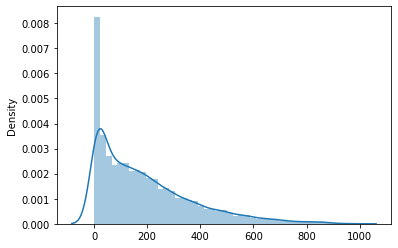

In [321]:
# 個人認為casual和registered是不用丟入訓練的，所以不視覺化

sns.distplot(x=data_train['count'])
plt.show()

In [322]:
# 處理count的離群值
# 個人認為casual和registered是不用丟入訓練的，所以不處理

print('Shape Of The Before Ouliers:',data_train.shape)
data_train = data_train[np.abs(data_train['count']-data_train['count'].mean())<=(3*data_train['count'].std())]
print('Shape Of The After Ouliers:',data_train.shape)

Shape Of The Before Ouliers: (10886, 12)
Shape Of The After Ouliers: (10739, 12)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


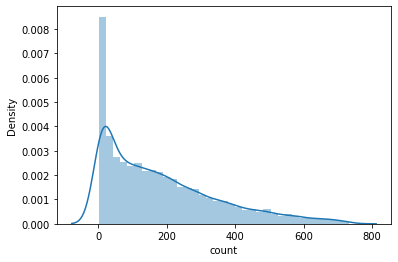

In [323]:
sns.distplot(data_train['count'])
plt.show()

In [324]:
# 這裡拆開datetime
# 刪除原本的datetime
def datetime_split(data):
  data['datetime'] = pd.to_datetime(data['datetime'],format='%Y/%m/%d %H:%M:%S')
  data['date'] = data['datetime'].dt.date
  data['year'] = data['datetime'].dt.year
  data['month'] = data['datetime'].dt.month
  data['weekday'] = data['datetime'].dt.weekday
  data['hour'] = data['datetime'].dt.hour

  

datetime_split(data_train)
datetime_split(data_test)

In [325]:
# 將類別變數更改型態，降低內存

def transform_cat(data):
  data[['season','holiday','workingday','weather']] = data[['season','holiday','workingday','weather']].astype('category')

transform_cat(data_train)
transform_cat(data_test)

In [326]:
# 處理windspeed 0太多的問題
# 將資料拆分，用風速不為0的資料訓練，並預測風速為0的資料
from sklearn.ensemble import RandomForestRegressor

dataWindIs0 = data_train[data_train['windspeed']==0]
dataWindNot0 = data_train[data_train['windspeed']!=0]
randomforestModel = RandomForestRegressor(n_estimators=1000,max_depth=10,random_state=42)
windColumns = ['season','weather','temp','atemp','humidity','month','year']
randomforestModel.fit(dataWindNot0[windColumns],dataWindNot0['windspeed'])
predicted = randomforestModel.predict(dataWindIs0[windColumns])

In [327]:
dataWindIs0['windspeed'] = predicted
data_train = dataWindNot0.append(dataWindIs0)
data_train.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


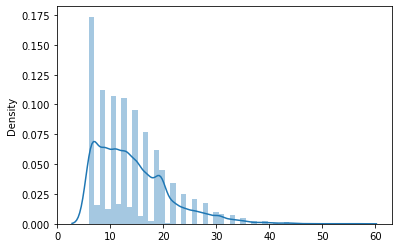

In [328]:
sns.distplot(x=data_train['windspeed'])

In [343]:
# 處理count的資料傾斜問題
# 使用log解決
# 若是X值有傾斜問題，則用正規化

X_train = data_train[pd.notnull(data_train['count'])].sort_values('datetime') # 按照日期排序
X_test = data_test.sort_values('datetime')

datetimecol = X_test['datetime']
y_train = X_train['count'] # 取得排完序後的count

unuse_col = ['count','casual','registered','datetime','date']
X_train.drop(columns=unuse_col,inplace=True)
X_test.drop(columns=unuse_col[3:],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


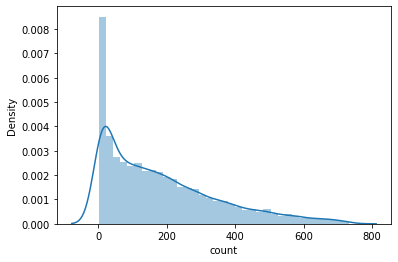

In [336]:
sns.distplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


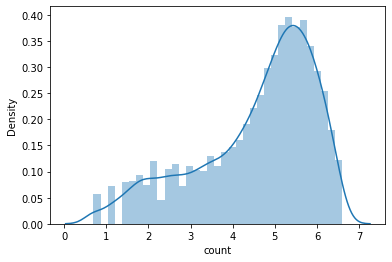

In [337]:
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log) 

### **模型訓練**

In [339]:
from sklearn.ensemble import RandomForestRegressor

randomforestModel = RandomForestRegressor(n_estimators=1000,max_depth=10,random_state=42)
randomforestModel.fit(X_train,y_train_log)
predicted = np.expm1(randomforestModel.predict(X_test))

In [344]:
submission = pd.DataFrame({
    'datetime':datetimecol,
    'count':predicted
})

submission.to_csv('./bike_sharing/bike_predictions_RF.csv',index=False)